In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"ASIANPAINT.csv")
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458
5305,2021-04-30,ASIANPAINT,EQ,2613.45,2595.0,2605.80,2524.05,2529.0,2536.40,2558.66,1384907,3.543512e+14,91934.0,750496.0,0.5419


In [3]:
data = df["Close"]
data.head()

0    381.65
1    385.55
2    383.00
3    377.50
4    385.70
Name: Close, dtype: float64

In [4]:
import matplotlib.pyplot as plt

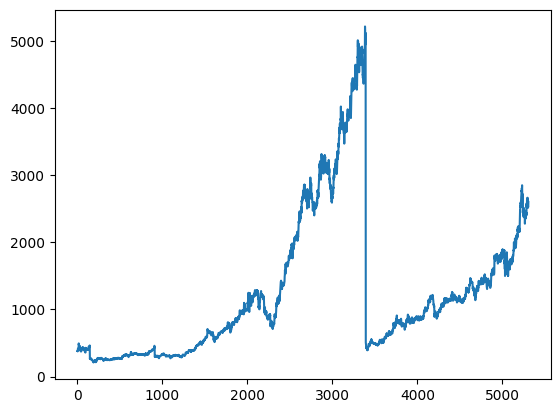

In [5]:
plt.plot(data)

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
df1 = scaler.fit_transform(np.array(data).reshape(-1,1))
df1

array([[0.03416394],
       [0.03494358],
       [0.03443382],
       ...,
       [0.48053415],
       [0.48031425],
       [0.46491149]])

In [9]:
def dataGenerator(data : np.ndarray,n_features:int):
    i = 0
    data = data.reshape(-1)
    columns = [f"f{i+1}" for i in range(n_features)]
    columns.append("Rate")
    
    df = pd.DataFrame(columns = columns)
    while(i < len(data) - n_features):
        features = data[i:i+n_features+1]

        df.loc[len(df.index)] = features.tolist()
        i+=1
    
    return df


In [10]:
df1 = dataGenerator(df1,100)
df1.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f93,f94,f95,f96,f97,f98,f99,f100,Rate
0,0.034164,0.034944,0.034434,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,...,0.032605,0.032035,0.031135,0.029526,0.037233,0.04348,0.04222,0.04265,0.04349,0.04195
1,0.034944,0.034434,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,...,0.032035,0.031135,0.029526,0.037233,0.043480,0.04222,0.04265,0.04349,0.04195,0.04306
2,0.034434,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,0.040641,...,0.031135,0.029526,0.037233,0.043480,0.042220,0.04265,0.04349,0.04195,0.04306,0.04308
3,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,0.040641,0.041700,...,0.029526,0.037233,0.043480,0.042220,0.042650,0.04349,0.04195,0.04306,0.04308,0.04230
4,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,0.040641,0.041700,0.041940,...,0.037233,0.043480,0.042220,0.042650,0.043490,0.04195,0.04306,0.04308,0.04230,0.04154


In [11]:
y = df1["Rate"]
X = df1.drop(["Rate"],axis = 1)

In [12]:
def train_test_split(X, y, train_size:float):

    if(train_size > 1 or train_size < 0):
        raise ValueError(f"{train_size}% is not a valid percentage")
    
    train_size = int(len(X)*train_size)
    test_size = len(X) - train_size

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    X_train.reset_index(drop=True,inplace=True)
    X_test.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True,inplace=True)
    y_test.reset_index(drop=True,inplace=True)

    return X_train, X_test, y_train, y_test

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,0.85)

In [14]:
X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,0.034164,0.034944,0.034434,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,...,0.033294,0.032605,0.032035,0.031135,0.029526,0.037233,0.043480,0.042220,0.042650,0.043490
1,0.034944,0.034434,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,...,0.032605,0.032035,0.031135,0.029526,0.037233,0.043480,0.042220,0.042650,0.043490,0.041950
2,0.034434,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,0.040641,...,0.032035,0.031135,0.029526,0.037233,0.043480,0.042220,0.042650,0.043490,0.041950,0.043060
3,0.033334,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,0.040641,0.041700,...,0.031135,0.029526,0.037233,0.043480,0.042220,0.042650,0.043490,0.041950,0.043060,0.043080
4,0.034974,0.040831,0.040871,0.041361,0.041570,0.039831,0.040101,0.040641,0.041700,0.041940,...,0.029526,0.037233,0.043480,0.042220,0.042650,0.043490,0.041950,0.043060,0.043080,0.042300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,0.184103,0.187522,0.188571,0.188411,0.189221,0.189481,0.190361,0.189881,0.189521,0.192609,...,0.182574,0.183914,0.186642,0.185593,0.184853,0.186532,0.181835,0.183044,0.183204,0.181385
4421,0.187522,0.188571,0.188411,0.189221,0.189481,0.190361,0.189881,0.189521,0.192609,0.191970,...,0.183914,0.186642,0.185593,0.184853,0.186532,0.181835,0.183044,0.183204,0.181385,0.178126
4422,0.188571,0.188411,0.189221,0.189481,0.190361,0.189881,0.189521,0.192609,0.191970,0.197187,...,0.186642,0.185593,0.184853,0.186532,0.181835,0.183044,0.183204,0.181385,0.178126,0.178726
4423,0.188411,0.189221,0.189481,0.190361,0.189881,0.189521,0.192609,0.191970,0.197187,0.193689,...,0.185593,0.184853,0.186532,0.181835,0.183044,0.183204,0.181385,0.178126,0.178726,0.179835


In [15]:
y_train

0       0.041950
1       0.043060
2       0.043080
3       0.042300
4       0.041540
          ...   
4420    0.178126
4421    0.178726
4422    0.179835
4423    0.181315
4424    0.181545
Name: Rate, Length: 4425, dtype: float64

In [16]:
y_test

0      0.178956
1      0.178086
2      0.179216
3      0.183284
4      0.183584
         ...   
776    0.469209
777    0.472498
778    0.480534
779    0.480314
780    0.464911
Name: Rate, Length: 781, dtype: float64

In [17]:
X_test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,0.189481,0.190361,0.189881,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,...,0.186532,0.181835,0.183044,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545
1,0.190361,0.189881,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,...,0.181835,0.183044,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956
2,0.189881,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,0.198097,...,0.183044,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956,0.178086
3,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,0.198097,0.195988,...,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956,0.178086,0.179216
4,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,0.198097,0.195988,0.194669,...,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956,0.178086,0.179216,0.183284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.388527,0.388727,0.400722,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,...,0.487751,0.483783,0.478065,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223
777,0.388727,0.400722,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,0.462842,...,0.483783,0.478065,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223,0.469209
778,0.400722,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,0.462842,0.461823,...,0.478065,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223,0.469209,0.472498
779,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,0.462842,0.461823,0.467260,...,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223,0.469209,0.472498,0.480534


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [20]:
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
try:
    history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32)
except KeyboardInterrupt:
    del model

Epoch 1/100
139/139 [==============================] - 14s 73ms/step - loss: 0.0044 - val_loss: 3.0968e-04
Epoch 2/100
139/139 [==============================] - 12s 85ms/step - loss: 0.0017 - val_loss: 2.0607e-04
Epoch 3/100
139/139 [==============================] - 12s 88ms/step - loss: 0.0012 - val_loss: 3.9034e-04
Epoch 4/100
139/139 [==============================] - 12s 83ms/step - loss: 8.3486e-04 - val_loss: 1.3454e-04
Epoch 5/100
139/139 [==============================] - 12s 87ms/step - loss: 7.2409e-04 - val_loss: 1.2116e-04
Epoch 6/100
139/139 [==============================] - 12s 88ms/step - loss: 6.6591e-04 - val_loss: 1.3385e-04
Epoch 7/100
139/139 [==============================] - 12s 87ms/step - loss: 5.3156e-04 - val_loss: 1.1480e-04
Epoch 8/100
139/139 [==============================] - 12s 87ms/step - loss: 5.4599e-04 - val_loss: 4.6716e-04
Epoch 9/100
139/139 [==============================] - 12s 89ms/step - loss: 4.5594e-04 - val_loss: 9.2501e-05
Epoch 10/100


In [329]:
model.save("model-1")

INFO:tensorflow:Assets written to: model-1\assets


INFO:tensorflow:Assets written to: model-1\assets


dict_keys(['loss', 'val_loss'])


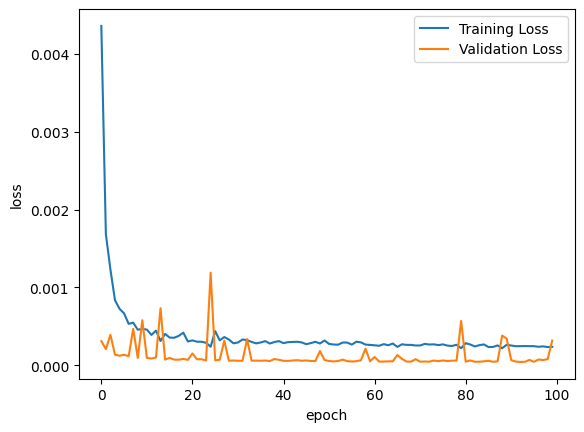

In [350]:
print(history.history.keys())
# plotting training and validation loss
plt.plot(history.history['loss'],label = "Training Loss")
plt.plot(history.history['val_loss'],label = "Validation Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [351]:
from sklearn.metrics import r2_score

In [352]:
y_pred = model.predict(X_test)

25/25 [==============================] - 1s 25ms/step


In [353]:
X_test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,0.189481,0.190361,0.189881,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,...,0.186532,0.181835,0.183044,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545
1,0.190361,0.189881,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,...,0.181835,0.183044,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956
2,0.189881,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,0.198097,...,0.183044,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956,0.178086
3,0.189521,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,0.198097,0.195988,...,0.183204,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956,0.178086,0.179216
4,0.192609,0.191970,0.197187,0.193689,0.193459,0.192589,0.202335,0.198097,0.195988,0.194669,...,0.181385,0.178126,0.178726,0.179835,0.181315,0.181545,0.178956,0.178086,0.179216,0.183284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.388527,0.388727,0.400722,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,...,0.487751,0.483783,0.478065,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223
777,0.388727,0.400722,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,0.462842,...,0.483783,0.478065,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223,0.469209
778,0.400722,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,0.462842,0.461823,...,0.478065,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223,0.469209,0.472498
779,0.403670,0.420822,0.439923,0.445391,0.452147,0.445421,0.462093,0.462842,0.461823,0.467260,...,0.471768,0.475167,0.490360,0.472008,0.468360,0.459884,0.461223,0.469209,0.472498,0.480534


In [354]:
r2_score(y_test,y_pred)

0.9542869629689804

In [355]:
r2_score(y_train,model.predict(X_train))

139/139 [==============================] - 4s 25ms/step


0.989803367452252

In [356]:
X_train.shape

(4425, 100)

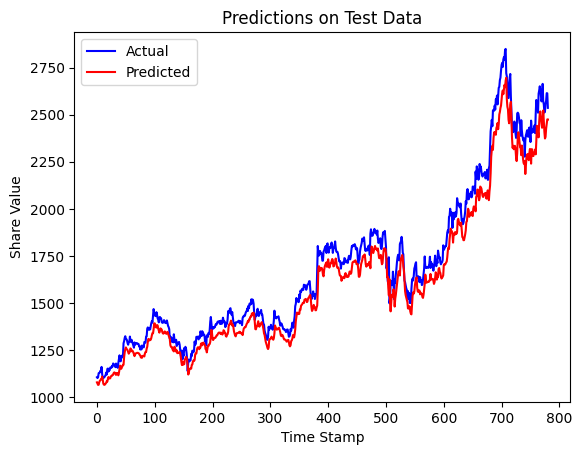

In [357]:
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)), color = "blue", label = "Actual")
plt.plot(scaler.inverse_transform(np.array(y_pred).reshape(-1,1)), color = "red", label = "Predicted")
plt.title("Predictions on Test Data")
plt.xlabel('Time Stamp')
plt.ylabel('Share Value')
plt.legend()

139/139 [==============================] - 3s 24ms/step


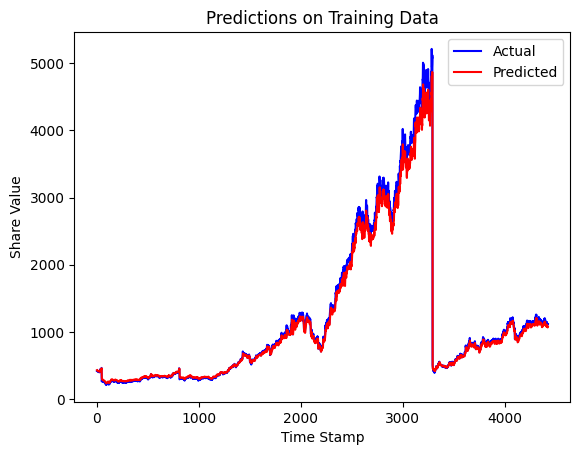

In [358]:
plt.plot(scaler.inverse_transform(np.array(y_train).reshape(-1,1)), color = "blue",label = "Actual")
plt.plot(scaler.inverse_transform(np.array(model.predict(X_train)).reshape(-1,1)), color = "red", label = "Predicted")
plt.title("Predictions on Training Data")
plt.xlabel('Time Stamp')
plt.ylabel('Share Value')
plt.legend()

In [359]:
pred = []
actual = []

pred.extend(scaler.inverse_transform(np.array(model.predict(X_train)).reshape(-1,1)).tolist())
pred.extend(scaler.inverse_transform(np.array(model.predict(X_test)).reshape(-1,1)).tolist())

actual.extend(scaler.inverse_transform(np.array(y_train).reshape(-1,1)).tolist())
actual.extend(scaler.inverse_transform(np.array(y_test).reshape(-1,1)).tolist())

25/25 [==============================] - 1s 25ms/step


In [360]:
print(pred[:5])

[[429.45416259765625], [426.917724609375], [428.01690673828125], [429.3957824707031], [428.39630126953125]]


In [361]:
print(actual[:5])

[[420.6], [426.15], [426.24999999999994], [422.35], [418.55]]


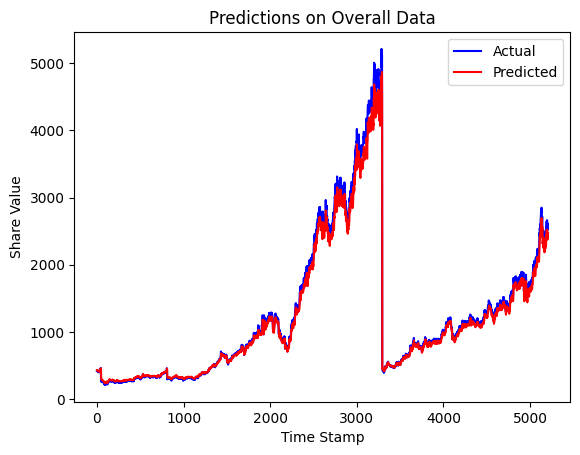

In [362]:
plt.plot(actual,color='blue',label = "Actual")
plt.plot(pred,color='red',label = "Predicted")
plt.title("Predictions on Overall Data")
plt.xlabel('Time Stamp')
plt.ylabel('Share Value')
plt.legend()

In [363]:
def future_data(data: np.ndarray, model: tf.keras.models.Sequential, n_features:int , n_days:int):


    data = data.reshape(-1)
    

    columns = [f"f{i+1}" for i in range(n_features)]

    temp_df = pd.DataFrame(columns=columns)

    result = []


    current_day = 0

    

    while(current_day < n_days):

        feature = data[-100:]
        
        temp_df.loc[len(temp_df)] = feature.tolist()

        res = model.predict(temp_df,verbose=0)

        data = np.append(data,res[0][-1])

        current_day+=1
        
    result = scaler.inverse_transform(np.array(res).reshape(-1,1))


    return result



In [364]:
df2 = scaler.transform(np.array(data).reshape(-1,1))

In [365]:
n_days = 30
n_features = 100
nxt_30 = future_data(data=df2, model=model, n_features=n_features, n_days=n_days)

In [366]:
temp = pred.copy()
temp.extend(nxt_30)

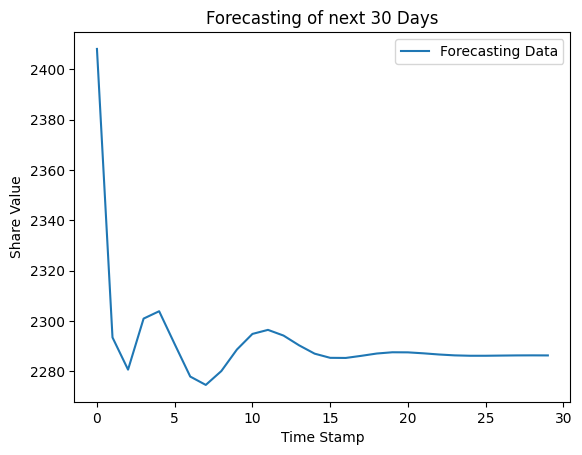

In [367]:
plt.title(f"Forecasting of next {n_days} Days")
plt.xlabel('Time Stamp')
plt.ylabel('Share Value')
plt.plot(nxt_30,label = "Forecasted Data")
plt.legend()

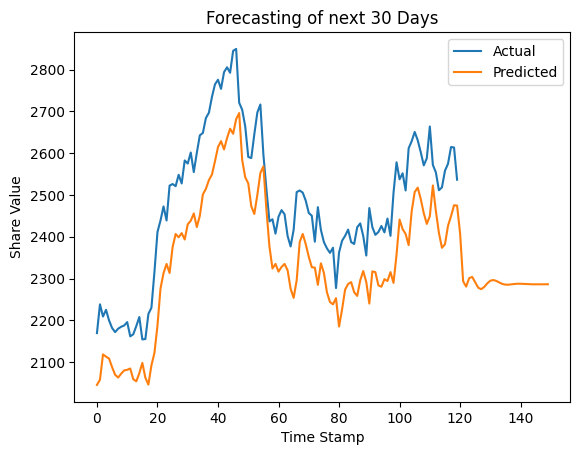

In [368]:
plt.title(f"Forecasting of next {n_days} Days")
plt.xlabel('Time Stamp')
plt.ylabel('Share Value')
plt.plot(actual[-120:],label="Actual")
plt.plot(temp[-150:],label="Predicted")
plt.legend()

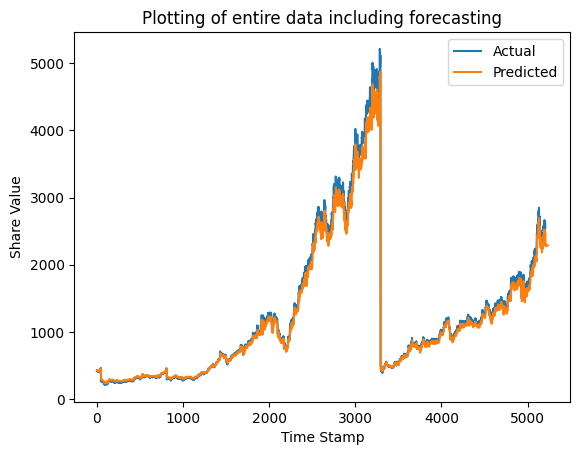

In [369]:
plt.title(f"Plotting of entire data including forecasting")
plt.plot(actual,label="Actual")
plt.plot(temp,label="Predicted")
plt.xlabel('Time Stamp')
plt.ylabel('Share Value')
plt.legend()